This practice is followed by the Krish Naik tutorial : https://www.youtube.com/watch?v=LZzq1zSL1bs

In [1]:
print(2+2)

4


In [5]:
data = (1,2,3,4,5,6,7)

data[3]

4

In [8]:
data = (1,2,3,5,4,5,6,7)

mid = data[3] + data[4]
med = mid/2
print(med)

4.5


In [2]:
import seaborn as sns

In [3]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

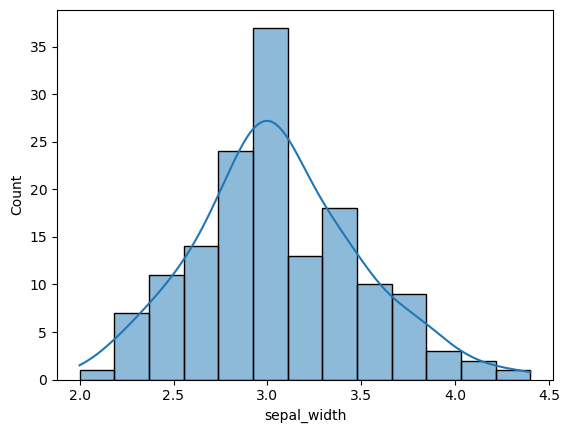

In [7]:
sns.histplot(data['sepal_width'], kde = True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='count'>

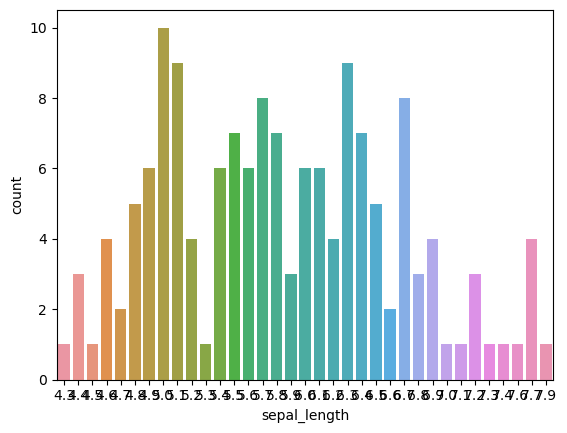

In [11]:
sns.countplot(data['sepal_length'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

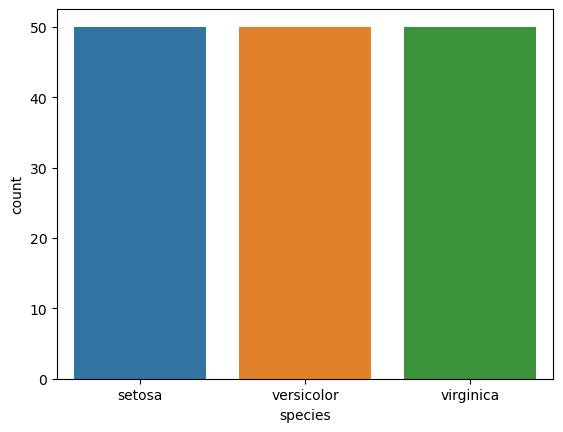

In [13]:
import os
sns.countplot(data['species'])

In [14]:
data.shape

(150, 5)

In [15]:
import numpy as np

In [25]:
np.percentile(data['sepal_width'], q = [0, 25, 50, 75, 100])

array([2. , 2.8, 3. , 3.3, 4.4])

In [31]:
IQR = np.percentile(data['sepal_length'], q = [75]) - np.percentile(data['sepal_length'], q = [25])
IQR

array([1.3])

In [29]:
np.percentile(data['sepal_length'], q = [75, 25])

array([6.4, 5.1])

In [32]:
6.4 - 5.1

1.3000000000000007

In [33]:
import matplotlib.pyplot as plt

In [59]:
dataset = [11,10,12,14,12,15,14,13,15,12,12,14,17,19,107,10,13,102,14,12,108,12,11,14,13,15,10,15,12,10,15,12,10,14,13,15,10]

In [60]:
np.mean(dataset)

20.45945945945946

In [61]:
mean = np.mean(dataset)

In [62]:
np.std(dataset)

25.402271227030074

In [63]:
std = np.std(dataset)

In [64]:
np.modf(dataset)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([ 11.,  10.,  12.,  14.,  12.,  15.,  14.,  13.,  15.,  12.,  12.,
         14.,  17.,  19., 107.,  10.,  13., 102.,  14.,  12., 108.,  12.,
         11.,  14.,  13.,  15.,  10.,  15.,  12.,  10.,  15.,  12.,  10.,
         14.,  13.,  15.,  10.]))

In [65]:
for i in dataset:
    z_score = (i - mean) / std
print(z_score)

-0.41175292421607357


In [77]:
outlier = []
for i in dataset:
    z_score = (i - mean)/std
    if np.abs(z_score) > 3:
        outlier.append(i)
print(outlier)

[107, 102, 108]


In [111]:
outliers = []
def detect_outliers(data):
    threshold = 3
    
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers, z_score

In [112]:
detect_outliers(dataset)

([107, 102, 108], -0.41175292421607357)

(array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

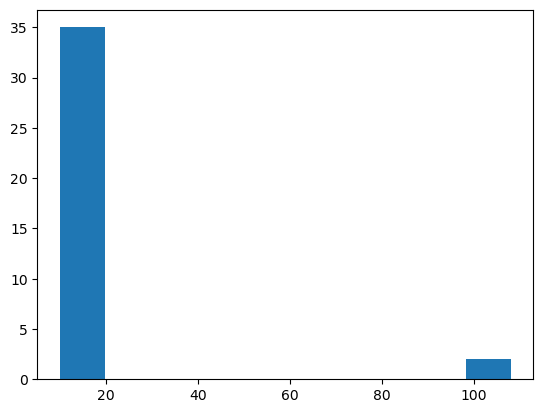

In [50]:
plt.hist(dataset)

### Measuring IQR (75th minus 25th percentile)
1. Sort the data
2. Calcualate Q1 and Q3
3. IQR: Q3-Q1
4. FInd the lower fence: Q1- 1.5(IQR)
5. Upper fence: Q3 + 1.5(IQR)

In [113]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [116]:
Q1, Q3 = np.percentile(dataset, q = [25,75])

In [117]:
Q1, Q3

(12.0, 15.0)

In [119]:
IQR = Q3-Q1
IQR

3.0

In [121]:
## Lower and higher fence
lower_fence = Q1 - 1.5*IQR
higher_fence = Q3 + 1.5*IQR

In [122]:
lower_fence

7.5

In [123]:
higher_fence

19.5

In [124]:
print(lower_fence, higher_fence)

7.5 19.5


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

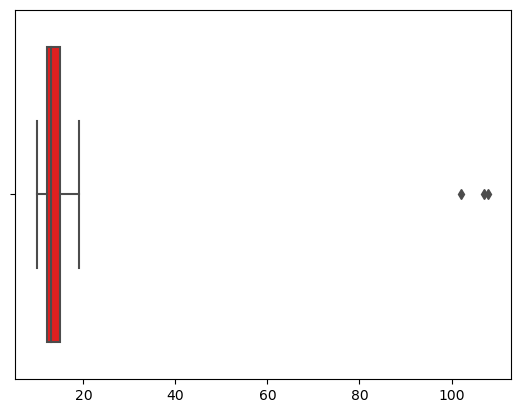

In [127]:
sns.boxplot(dataset, color = 'red')

# Chi Square test

Suppose the IQ in a certain population is normally distrubuted with a mean of 100 (miu) and standard deviation of 15 (alpha).

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.

The following code shows how to perform a one sample z-test in Python to determine if the new drug causes signifincant difference in IQ levels:

In [6]:
from statsmodels.stats.weightstats import ztest as ztest

# IQ levels for 20 samples
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
       105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

z-score, p-value

In [13]:
ztest(data, value=110)

(-3.640487595530384, 0.00027212221833431376)

In [12]:
## compare with alpha value

0.11012667014 < 0.05

False